In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import numpy as np

**Ques1.** We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

##### Task:
1.Fitting it to the periodic function

2.Plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

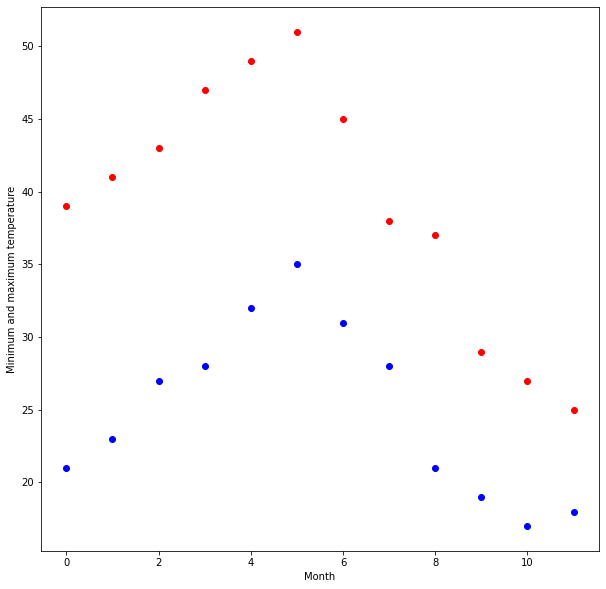

In [2]:
x = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
y = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.figure(figsize = (10,10))
plt.plot(months, x, 'ro')
plt.plot(months, y, 'bo')
plt.xlabel('Month')
plt.ylabel('Minimum and maximum temperature')
plt.show()

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, x)
res_min, cov_min = optimize.curve_fit(yearly_temps, months, y)

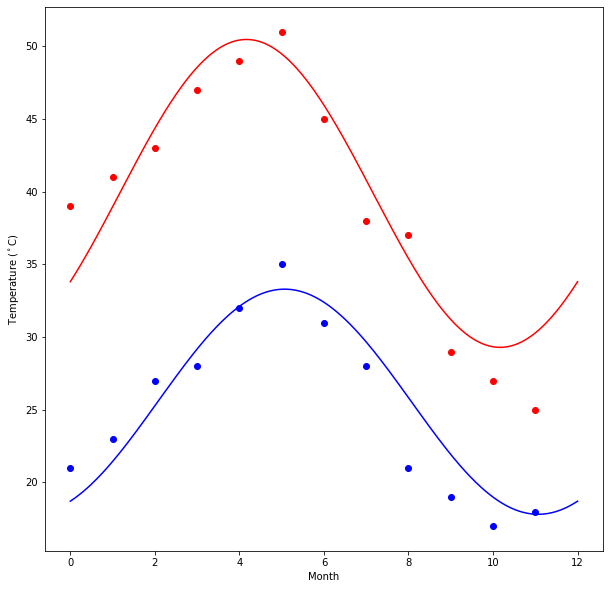

In [11]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(10,10))
plt.plot(months, x, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, y, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

**Ques 2**

#### Part 1: Create a pie chart presenting the male/female proportion

In [5]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df['sex_id'] = df['sex'].apply(lambda x: int(x == 'female'))

In [7]:
temp = df.groupby('sex_id').count()
temp

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex_id,,,,,,,,,,,,,,
0,843,843,843,843,658,843,843,843,842,154,843,167,113,457
1,466,466,466,466,388,466,466,466,466,141,464,319,8,288


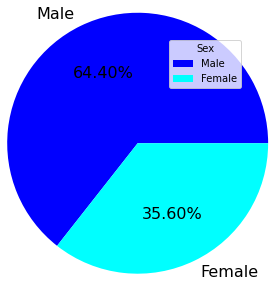

In [8]:
plt.pie(temp['sex'], labels=['Male', 'Female'], radius=1.5, textprops={'fontsize': 16}, autopct='%.2f%%', colors=['blue', 'cyan'])
plt.legend(title = 'Sex', loc = 1)
plt.show()

#### Part 2: Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

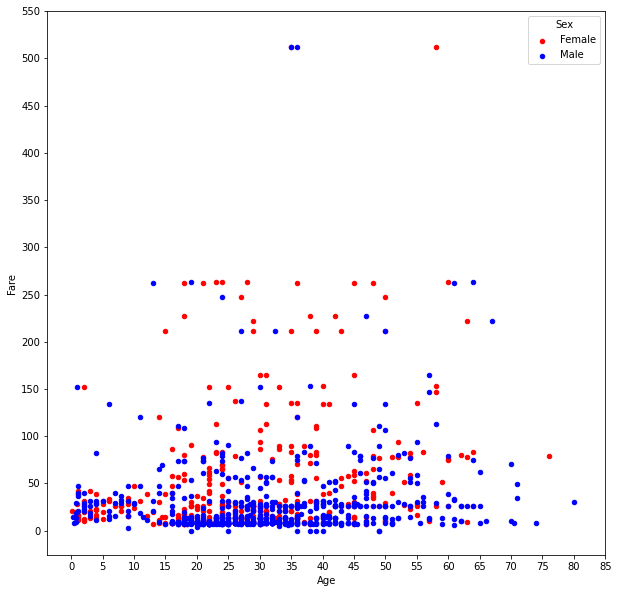

In [9]:
fig, ax = plt.subplots()
colors = {'male':'blue', 'female':'red'}
grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='fare', label=key.capitalize(), color=colors[key], figsize = (10,10))
plt.legend(title = 'Sex', loc = 1)
plt.xticks(range(0,90,5))
plt.yticks(range(0,600,50))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()